<a href="https://colab.research.google.com/github/sakshi0109/MachineLearning/blob/master/Lab2_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

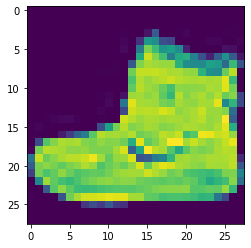

In [22]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [25]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4936 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3359 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.8911


In [26]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8808


[0.339725524187088, 0.8808000087738037]

Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?



In [27]:
classifications = model.predict(test_images)

print(classifications[0])

[1.1626528e-05 3.3180487e-07 2.7321978e-06 2.6624900e-06 5.7783041e-07
 1.6691392e-02 2.2293094e-05 3.3456665e-02 1.4104728e-04 9.4967067e-01]


In [28]:
print(test_labels[0])

9


What does this list represent?
The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.



How do you know that this list tells you that the item is an ankle boot?
Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

Question 1. Increase to 1024 Neurons -- What's the impact?
by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

Exercise 3:
What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.



In [29]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc4
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5260
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3967
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3558
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3336
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3795
[6.56078100e-06 1.21655376e-07 4.96328312e-06 3.42910316e-05
 6.70851068e-06 1.02287065e-02 1.39479362e-05 1.03484981e-01
 6.47573732e-04 8.85572135e-01]
9


Exercise 4:
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [30]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc4
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5143
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3912
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3529
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3297
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3587
[5.1819040e-07 5.8452989e-09 4.2870411e-08 6.0709574e-08 1.2673661e-07
 7.5507439e-03 1.0884647e-06 8.7234177e-02 5.4000079e-04 9.0467322e-01]
9


Exercise 5:
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.



In [31]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0-rc4
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4686
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3554
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3218
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2974
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3394
[9.34920408e-09 7.49257083e-07 1.99822914e-09 3.45886608e-09
 1.47225021e-09 2.79475556e-04 1.10357385e-08 1.32299995e-03
 1.82425941e-09 9.98396695e-01]
9


Exercise 6:
Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [32]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.2.0-rc4
Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4971
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3416
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3151
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2981
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2697
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2561
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2475
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2367
Epoch 11/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2298
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss

Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?



In [33]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.2.0-rc4
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4753
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3553
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3225
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2973
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3396
[1.0228383e-06 6.7172512e-09 6.5741141e-08 1.8859445e-09 8.6139792e-08
 4.9062543e-02 3.1051385e-07 4.6067484e-02 7.6506185e-06 9.0486079e-01]
9


Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [34]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.2.0-rc4
Epoch 1/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.8299

TypeError: ignored